# Digital Equity and Inclusion - Machine Learning to close the digital divide #
                  
   **Jason Kronemeyer (jfkrone@umich.edu), Liang Yao(yaoliang@umich.edu), Samuel Buxton (sambux@umich.edu)**



## The Goal: ##

**This project aims to measure and forecast progress on digital equity in Michigan. Digital equity refers to the equal distribution of digital resources and opportunities, including access to high-speed internet, digital devices, and digital literacy training. One challenge in this project is the availability and quality of data on digital equity in Michigan. Another challenge is the complexity of the problem, as there are many socioeconomic factors that contribute to the digital divide.**
 
The project will consist of two parts:

**Part A(Supervised learning):** Our goal is to forecast internet access and digital equity levels in areas of
Michigan. Since we are using both categorical and quantitative variables to predict our quantitative equity metric, we plan to compare the efficacy of a linear regression approach with dummy variables against a random forest regressor.
 
**Part Part B(Unsupervised learning):** Our goal is know about pattern or structure of the dataset, and identify the principal components and features in the data that can help us to understand and predict progress on digital equity in Michigan..

# Section 1 ****************************************************?
input your comments here.
## Question:
**(1)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~?**

**(2) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~````````````````?**


Install libraries

In [1]:
#!pip install ****


Import libraries

In [2]:
# import packages we need


Remove warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Display settings
xr.set_options(display_style='html') # make the display_style of xarray more user friendly
%matplotlib inline
%config InlineBackend.figure_format = "retina" # make figures look better 

## Step 1: Read data from url which is ************************************

edit here

## Step 2: Create the Visualization ***
edit here

## Step 3: Calculate ****
edit here

## Step 4: ***********************

## Step5: ******

### Findings:
    1. **********************************
    2. **********************************
    3. **********************************
    4. **********************************

# Section 2 What are the potential problems caused by World Temperature Change?
Based on the Report **“Causes and Effects of Climate Change”** from the United Nations(U.N.)
https://www.un.org/en/climatechange/science/causes-effects-climate-change, we can read Global climate change may cause some vital problems in front of humans. There are many kinds of effects, but in order to make the project run smoothly, we just select some of them and try to validate them by testing real world historic data. 

## The selected 3 problems to analyze are: ##

**(1) Not enough food**

**(2) More health risks**

**(3) Poverty and displacement**


The data source we can find from the public platform is limited, we try to collect some data relating to these effects.

- Related to **“Not enough food” problem,**-
we will use dataset:

               (1)Forest area (% of land area); 
               (2)Agricultural land (% of land area)                
               (3)Cereal yield (kg per hectare)
               
- Related to **“More health risks” problem,**-
we will use dataset:

               (4)Death Rate; 
               (5)Life Expectancy; 
               (6)Birth Rate;
               
- Related to **“Poverty and displacement” problem,**-
we will use dataset:

               (7)Net Migration; 
               (8)Unemployment Rate; 
               (9)Inflation Rate; 

These 9 datasets were derived from free publice platform: https://data.worldbank.org/

## STEP 1: Manipulate the temperature change data and create chart 1.

In [48]:
# Manipulation the temperature change data and read from csv file.
raw_data=pd.read_csv("assets/temperature change original data.csv")
raw_data.head()
# This raw dataset includes many kinds of areas data, we need to clean it and filter country's data out.


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


In [49]:
# Get 193 countries' names and filter these countries' temperature change history data.
# I use 193 countries names from 193 Member States of the United Nations https://www.un.org/en/about-us/member-states
# The name is not unified expression in temperature dataset, so I have to extend the name's library that includes 
# other kind of names for the same country.
country_name=pd.read_csv("assets/193 country name.csv")
country_name=country_name.iloc[0:193][["Country Codes","Country Name"]]
country_new_name=list(country_name["Country Name"])
country_new_name
country_new_name.extend(['Bahamas','Bolivia (Plurinational State of)',
      'Congo',"C?te d'Ivoire","Democratic People's Republic of Korea",
    "Democratic Republic of the Congo","Egypt","Gambia","Iran (Islamic Republic of)",
    "Kyrgyzstan","Lao People's Democratic Republic","Micronesia (Federated States of)",
    "Republic of Korea","Republic of Moldova","Saint Kitts and Nevis","Saint Lucia",
    "Saint Vincent and the Grenadines","Czechoslovakia","Turkey",
    "United Kingdom of Great Britain and Northern Ireland",
    "United Republic of Tanzania","United States of America","Venezuela (Bolivarian Republic of)",
    "Viet Nam","Yemen"])

In [50]:
# Now we extract 193 countries we need. And transform into another useful dataframe:country_data from raw data.
country_data=pd.DataFrame(columns=["Area","Months","Year","Value"])
for i in country_new_name:
        country_data=country_data.append(raw_data[(raw_data["Area"])==i][["Area","Months","Year","Value"]])
print(len(set(list(country_data["Area"]))))
# Check the number of country data should be 193

193


In [51]:
# Now we extract the columns we need. And transform into another useful dataframe:world_temp_change for create chart.
world_temp=[]
for i in range(1961,2021):
    x=float(round(country_data[(country_data["Months"]=="Meteorological year")&(country_data["Year"]==i)][['Value']].mean(),2))
    world_temp.append(x)    
world_temp
world_temp_change=pd.DataFrame(world_temp, 
             columns = ['World Temperature Change'], 
             index = [x for x in range(1961,2021)])
world_temp_change=world_temp_change.reset_index()
world_temp_change=world_temp_change.rename(columns={"index":"Year"})
world_temp_change.head()

,Year,World Temperature Change
0,1961,0.17
1,1962,-0.02
2,1963,-0.02
3,1964,-0.12
4,1965,-0.25


In [52]:
# Plot Chart1:World Temperature Change,
# because it will be key line within whole project, 
# Use Altair tool's interactive function to present it;
# We present it in red color;
# You can try clicking the point to see the value of temperature change.
line=alt.Chart(world_temp_change).mark_line(color='Red').encode(
    x='Year:N',
    y='World Temperature Change:Q'
).properties(
   height=300, width=800)

point=alt.Chart(world_temp_change).mark_circle(color='Red',size=50).encode(
    x='Year:N',
    y=alt.Y('World Temperature Change:Q',title="World Temperature Change(C)",scale=alt.Scale(domain=[-0.3,1.8])),
    tooltip='World Temperature Change').properties(
   height=300, width=800).interactive()

(point+line).configure_axisX(labelAngle=-45).properties(
    title="Chart1: World Temperature Change")

alt.LayerChart(...)

**FINDING 1:**
- From Chart1, we can read the Temperature Change is rising from 1961 to 2020 year. It rose about 1.5 centigrade.**

## STEP 2: Check the 1st problem from U.N. report -- “Not enough food” 

In [53]:
# Start to check first effect from U.N. report, “Not enough food” , 
# we hope to know the relationship between the dataset and temperature rising.
# We will use data:
# 1）Forest area (% of land area); (1st dataset)
# 2）Agricultural land (% of land area) (2nd dataset)
# 3）Cereal yield (kg per hectare) (3rd dataset)
# read the datasets from csv files：
cereal_raw_data=pd.read_csv("assets/World Cereal Yield.csv")
forest_raw_data=pd.read_csv("assets/World Forest Area.csv")
agriculture_raw_data=pd.read_csv("assets/World Agriculture Land.csv")

# We can check them one by one.

In [54]:
#Start to check first effect from U.N. report,“More health risks” problem
# We will use data:
# 1）Death Rate; (4th dataset)
# 2）Life Expectancy; (5th dataset)
# 3）Birth Rate;(6th dataset)
# read the datasets from csv files：
death_raw_data=pd.read_csv("assets/World Death Rate.csv")
birth_raw_data=pd.read_csv("assets/World Birth Rate.csv")
life_T_raw_data=pd.read_csv("assets/Life Expectancy Total.csv")

In [55]:
# Start to check third effect from U.N. report,“Poverty and displacement” problem
# We will use data:
# 1）Unemployment Rate; (7th dataset)
# 2）Net Migration; (8th dataset)
# 3）Inflation Rate; (9th dataset)
# read the datasets from csv files：
Une_raw_data=pd.read_csv("assets/World Unemployment Total.csv")
Mig_raw_data=pd.read_csv("assets/World Net Migration.csv")                 
Inf_raw_data=pd.read_csv("assets/World Inflation Rate(consumer prices).csv")

In [56]:
# Analyze the first dataset:Cereal yield (kg per hectare)
# We extract the columns we need and then transform into another useful dataframe:world_cereal_df
# In order to modulize the code, I use function here.
def get_transform_df(raw_data=cereal_raw_data, a=1961,b=2021,title='Cereal Yield(kg per hectare)'):
    new_data=pd.DataFrame(columns=list(raw_data.columns))
    for i in country_new_name:
        new_data=new_data.append(raw_data[(raw_data["Country Name"])==i])
    #print(len(new_data))
    new_list=[]
    for i in range(a,b):
        i=str(i)
        x=round(new_data[i].mean(),1)
        new_list.append(x)
    
    new_df=pd.DataFrame(new_list, 
             columns = [title], 
             index = [x for x in range(a,b)])
    new_df=new_df.reset_index()
    new_df=new_df.rename(columns={"index":"Year"}) 
    return new_df



In [57]:
# Agriculture data
world_cereal_df=get_transform_df(raw_data=cereal_raw_data,a=1961,b=2021,title='Cereal Yield(kg per hectare)')
world_forest_df=get_transform_df(raw_data=forest_raw_data,a=1990,b=2021,title='Forest Area(% of land area)')
world_agriculture_df=get_transform_df(raw_data=agriculture_raw_data,a=1961,b=2021,title='Agriculture Land(% of land area)')

# Health data
world_death_df=get_transform_df(raw_data=death_raw_data,a=1961,b=2021,title='Death Rate')
world_birth_df=get_transform_df(raw_data=birth_raw_data,a=1961,b=2021,title='Birth Rate')
world_life_T_df=get_transform_df(raw_data=life_T_raw_data,a=1961,b=2021,title='Life Expectancy Total')

# Ecomonic data
world_une_df=get_transform_df(raw_data=Une_raw_data,a=1991,b=2021,title='Unemployment,total(% of total labor force)')
world_mig_df=get_transform_df(raw_data=Mig_raw_data,a=1961,b=2021,title='Net Migration')
world_inf_df=get_transform_df(raw_data=Inf_raw_data,a=1981,b=2021,title='Inflation Rate %')

In [58]:
merged_df = pd.merge(world_temp_change,world_cereal_df,on ='Year', how='outer')\
    .merge(world_forest_df,on ='Year', how='outer')\
    .merge(world_agriculture_df,on ='Year', how='outer')\
    .merge(world_death_df,on ='Year', how='outer')\
    .merge(world_birth_df,on ='Year', how='outer')\
    .merge(world_life_T_df,on ='Year', how='outer')\
    .merge(world_une_df,on ='Year', how='outer')\
    .merge(world_mig_df,on ='Year', how='outer')\
    .merge(world_inf_df,on ='Year', how='outer')\
    
merged_df.head()

,Year,World Temperature Change,Cereal Yield(kg per hectare),Forest Area(% of land area),Agriculture Land(% of land area),Death Rate,Birth Rate,Life Expectancy Total,"Unemployment,total(% of total labor force)",Net Migration,Inflation Rate %
0,1961,0.17,1329.5,NaN,38.0,15.9,38.7,53.9,NaN,-46.7,NaN
1,1962,-0.02,1396.9,NaN,38.0,15.7,38.5,54.3,NaN,-38.0,NaN
2,1963,-0.02,1388.9,NaN,38.2,15.4,38.2,54.6,NaN,-14.0,NaN
3,1964,-0.12,1422.5,NaN,38.2,15.0,37.7,55.2,NaN,-11.6,NaN
4,1965,-0.25,1439.1,NaN,38.3,14.8,37.2,55.5,NaN,12.7,NaN


In [59]:
corr_matrix = merged_df.iloc[:, 1:].corr()

[Text(0.5, 1.0, 'Chart2: Correlation Matrix')]

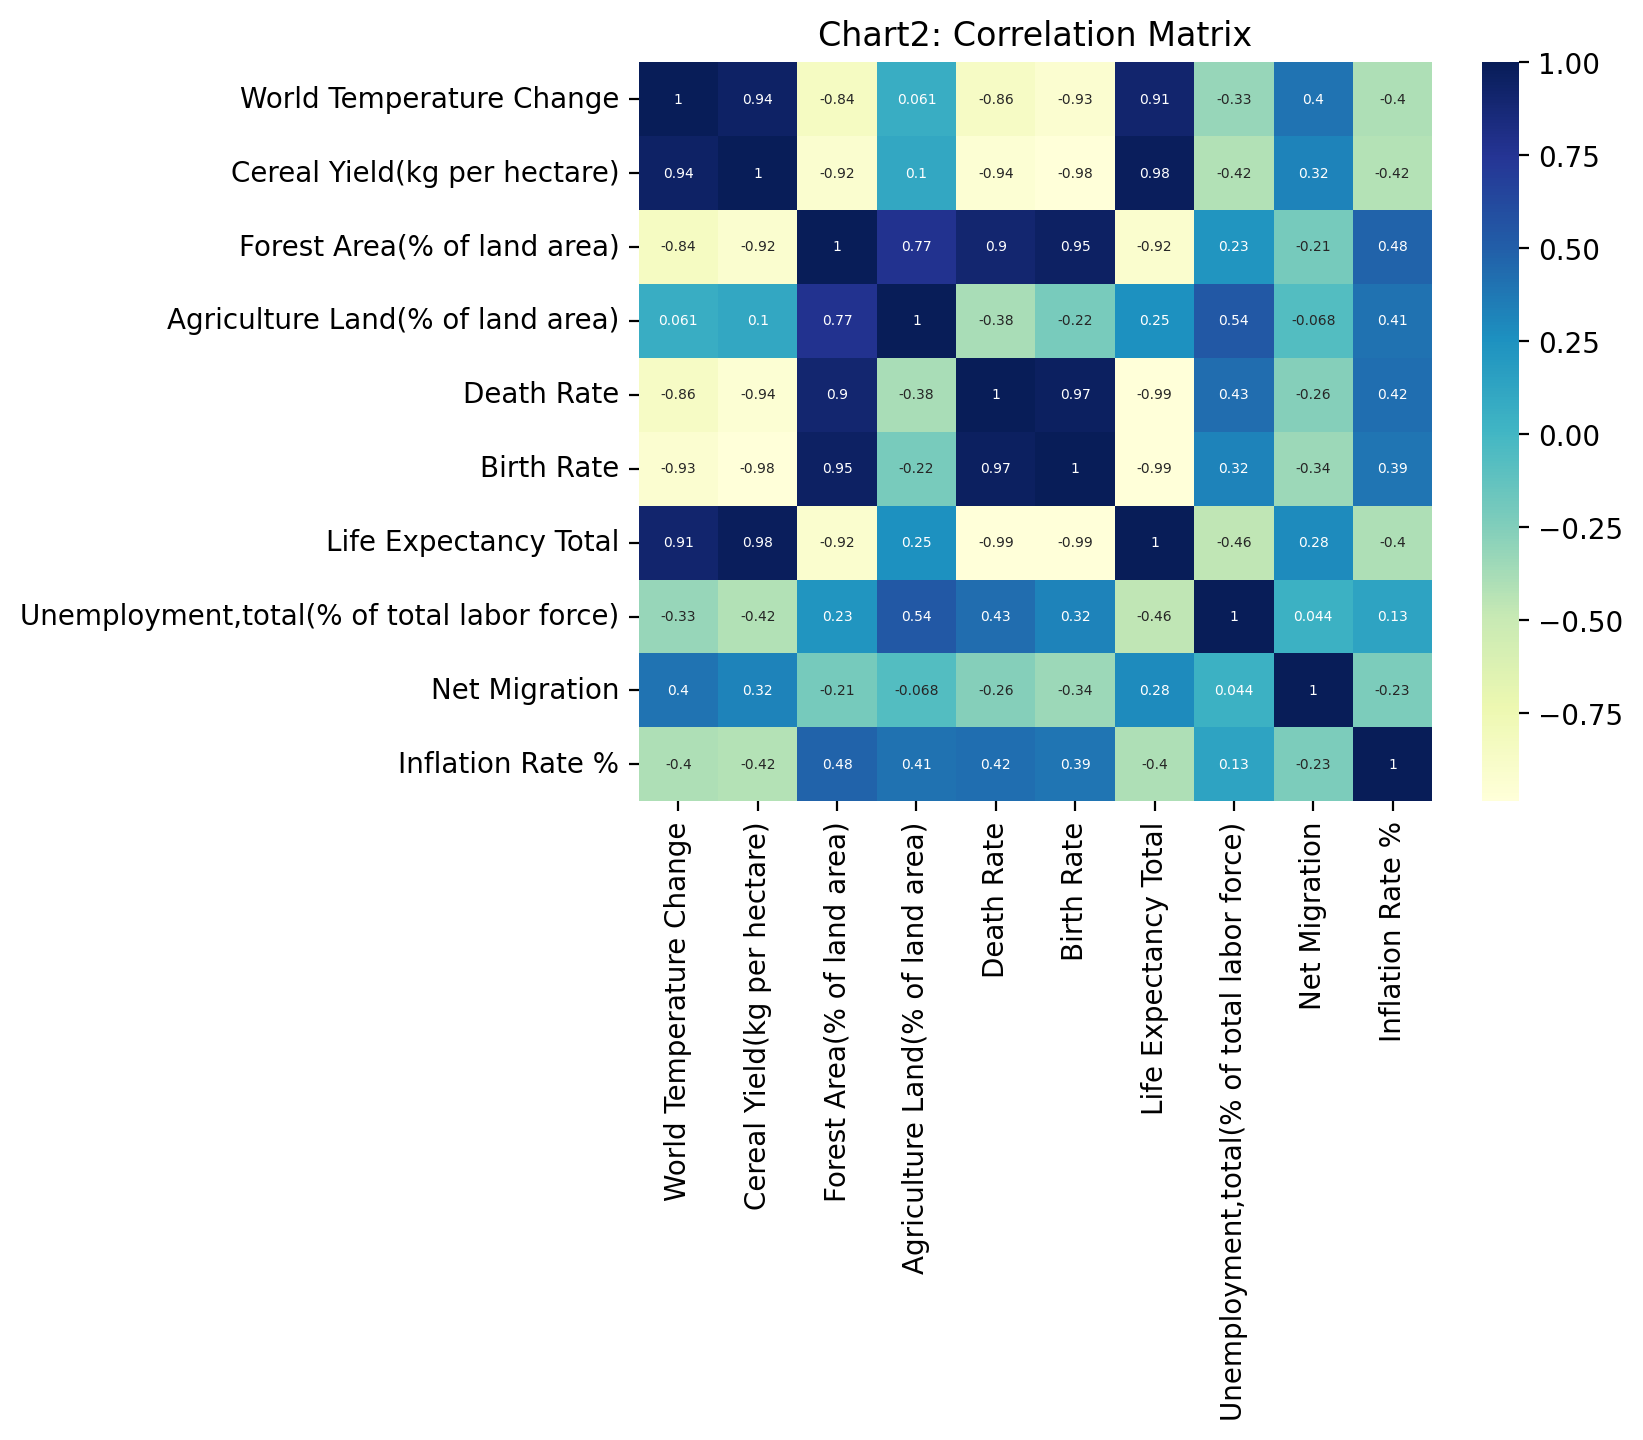

In [60]:
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, annot_kws={"fontsize":5}).set(title='Chart2: Correlation Matrix')

**FINDING 2:**

we can read numerical value
- Related to **“Not enough food” problem,**

3 variables:

    (1) Variable 1: Cereal yield (kg per hectare) = 0.94
    (2) Variable 2: Forest area (% of land area) = -0.84
    (3) Variable 3: Agricultural land (% of land area) = 0.061
- Related to **“More health risks” problem,**

3 variables:

    (4) Variable 4: Death Rate = -0.86
    (5) Variable 5: Life Expectancy = 0.91
    (6) Variable 6: Birth Rate = -0.93
- Related to **“Poverty and displacement” problem,**

3 variables:
    
    (7) Variable 7: Net Migration = -0.33
    (8) Variable 8: Unemployment Rate = 0.4
    (9) Variable 9: Inflation Rate = -0.4

So here, we can see it clearly that Variable 1: Cereal yield (kg per hectare) = 0.94 positive,
Variable 2: Forest area (% of land area) = -0.84 negative, Variable 4: Death Rate = -0.86 negative, Variable 5: Life Expectancy = 0.91 positive, Variable 6: Birth Rate = -0.93 negative, these 5 variables have high significant relationship with World temperature changing.

Based on the viewpoint from the U.N. Report:

- (1)Rising temperature will cause “Not enough food” problem that means making Cereal yield decrease, making Forest area decrease, making Agricultural land decrease. So **only Variable 2: Forest area (% of land area)** = -0.84 negative relationship **<font color=green>can support</font>** the opinion from U.N. report.
- (2)Rising temperature will cause “More health risks” problem that means making Death Rate increase, making Life Expectancy decrease, making Birth Rate decrease. So **only Variable 6: Birth Rate** = -0.93 negative relationship **<font color=green>can support</font>** the opinion from U.N. report.
- (3)Rising temperature will cause “Poverty and displacement” problem that means making Net Migration increase, making Unemployment Rate decrease, making Inflation Rate increase. But there is no signification correlation within variable7 to 9. So, in this project, variables **<font color=red>can not support</font>** the opinion from U.N. report.

In [61]:
subplot_titles = merged_df.columns.tolist()[2:]
rows =3
cols =3
specis = {"secondary_y": True}
fig = make_subplots(rows=rows, cols=cols,
                    shared_xaxes=True,
                    specs=[[specis]*cols]*rows,
                    subplot_titles=subplot_titles,
                    
                    )

for row_index in range(1,1+rows):
    for col_index in range(1,1+cols):

        trace1 = go.Scatter(x=merged_df['Year'],
                        y=merged_df['World Temperature Change'], 
                        mode='lines', 
                        name='Average temp', 
                        line=dict(color='red',width=1.2),
                        showlegend=False
                       )

        trace2 = go.Scatter(x = merged_df['Year'],
                        y=merged_df.iloc[:,(row_index-1)*cols+col_index+1],
                        mode = 'lines',
                        line=dict(width=1.2),
                        name=merged_df.columns.tolist()[(row_index-1)*cols+col_index],
                        showlegend=True
                       )

        fig.add_trace(trace1, row=row_index, col=col_index,secondary_y=False)
        fig.add_trace(trace2, row=row_index, col=col_index,secondary_y=True)

fig.update_layout(height=800, width=1000, title_text="Chart3: Global climate change VS")
fig.update_annotations(font=dict(size=12))
fig.update_layout(legend=dict(x=0, y=-0.2, orientation='h'))
fig.show()

**FINDING 3:**
- From subplot1, we can read the Cereal Yield(kg per hectare) is rising by year. It is positive relationship. That means food become more than before.So this dataset **<font color=red>can not support</font>** the effect opinion from U.N. report that said temperature rising will cause "Not enough food"
- From subplot2, we can read the World forest area(% of land area) is decreasing by year.  It is negative relationship.So this dataset **<font color=green>can support</font>** the effect opinion from U.N. report that said temperature rising will cause "Not enough food"
- From subplot3, we can not read obvious trend of the World Agriculture Land(% of land area) from 1961 to 2020. And if we check Chart2, correlation value is 0.061, it means that no significant correlation. So this dataset **<font color=red>can not strongly support</font>** the effect opinion from U.N. report that said temperature rising will cause "Not enough food"
- From subplot4, we can the world death rate is declining over years. It is negative relationship. So this dataset **<font color=red>can not support</font>** the effect opinion from U.N. report that said temperature rising will cause "More health risks"
- From subplot5, we can read the world birth rate is declining by year. It is positive relationship. So this dataset **<font color=green>can support</font>** the effect opinion from U.N. report that said temperature rising will cause "More health risks"
- From subplot6, we can read the world life expectancy(Total) are rising over years. So this dataset **<font color=red>can not support</font>** the effect opinion from U.N. report that said temperature rising will cause "More health risks"
- From subplot7, we can not read obvious trend of the World Unemployment Rate. And if we check Chart2, correlation value is 0.4, it means that no significant correlation. So this dataset **<font color=red>can not support</font>** the effect opinion from U.N. report that said temperature rising will cause "Poverty and displacement"
- From subplot8, we can not read obvious trend of the World Net Migration(million people). And if we check Chart2, correlation value is -0.33, it means that no significant correlation. So this dataset **<font color=red>can not support</font>** the effect opinion from U.N. report that said temperature rising will cause "Poverty and displacement"
- From subplot9, we can not read obvious trend of the World Inflation Rate. And if we check Chart2, correlation value is 0.4, it means that no significant correlation. So this dataset **<font color=red>can not support</font>** the effect opinion from U.N. report that said temperature rising will cause "Poverty and displacement"

## STEP 3: Dig more in Forest area and Birth Rate

In [62]:
# Dig more, create Chart4: World Temperature Change and Top 5 countries Forest area'
# From Subplot2, we can see the trend of world forest area changing can match the opinion from the U.N. Report.
# So we try to dig more from the data.
# We would like pickup Top 5 Countries in Forest area based on sq. km not "% of land area" they are:
# No.1 Russian, No.2 Brazil, No.3 Canada, No.4 United States, No.5 China
# To check the difference of trend.
Top5_forest_data=forest_raw_data[(forest_raw_data["Country Name"]=="Russian Federation")|
                (forest_raw_data["Country Name"]=="Brazil")|
                (forest_raw_data["Country Name"]=="Canada")|
                (forest_raw_data["Country Name"]=="United States")|
                (forest_raw_data["Country Name"]=="China")][[(str(x)) for x in range(1990,2021)]]

In [63]:
Top5_forest_data_t = Top5_forest_data.transpose().dropna()

In [64]:
Top5_forest_data_rename = Top5_forest_data_t.reset_index().rename(columns={'index': 'Year',
                                    29: 'Brazil',
                                    35: 'Canada',
                                    39: 'China',
                                    201: 'Russian Federation',
                                    250: 'United States'})

In [65]:
x = Top5_forest_data_rename['Year']

# Create a bar plot with data from different times
fig = go.Figure()
for i in range(1,6):
    fig.add_trace(go.Scatter(x=x, 
                             y=Top5_forest_data_rename.iloc[:,i], 
                             mode='lines+markers',
                             name=Top5_forest_data_rename.columns.to_list()[i]))


# Set the layout of the plot
fig.update_layout(title='Chart4: World Temperature Change and Top 5 countries Forest area',
                  xaxis_title='Date', yaxis_title='Forest Area(% of land area)')

# Show the plot
fig.show()


**FINDING 4:**
- From Chart4, we can read these Top 5 countries trends of forest area(% of land area) are slightsly different between each other . 
- Russian as ranking No.1 in square km of forest area over the world, it kept flat and have no obvious variation from 1991 to 2020. Similar with No.3 Canada and No.4 United States.
- Brazil as ranking No.2 in square km of forest area over the world,it had a slow decline from 1990 to 2020, look like Brazil's data, these two lines match the opinion "Not enough food" from the U.N. Report.
- China as ranking No.5, conversely，its forest area had a growth gradually over the years, which cannot support the opinion.

In [66]:
# Dig more, create Chart5: World Temperature Change and Top 5 countries Birth Rate'
# From Chart7, we can see the trend of world birth rate from 1961 to 2020 can match the opinion from the U.N. Report.
# So we try to dig more from the data.
new_data=pd.DataFrame(columns=list(birth_raw_data.columns))
for i in country_new_name:
    new_data=new_data.append(birth_raw_data[(birth_raw_data["Country Name"])==i])
new_data[["2020","Country Name"]].sort_values(by="2020").head(5)

,2020,Country Name
126,5.3,"Korea, Rep."
212,6.4,San Marino
116,6.8,Italy
119,6.8,Japan
70,7.1,Spain


In [67]:
# Now we got 5 Lowest Birth Rate countries they are:
# No.1 Korea, No.2 San Marino, No.3 Japan, No.4 Italy, No.5 Spain
# To check the difference of trend.
Lowest5_birth_data=birth_raw_data[(birth_raw_data["Country Name"]=="Korea, Rep.")|
                (forest_raw_data["Country Name"]=="San Marino")|
                (forest_raw_data["Country Name"]=="Japan")|
                (forest_raw_data["Country Name"]=="Italy")|
                (forest_raw_data["Country Name"]=="Spain")][[(str(x)) for x in range(1961,2021)]]

Lowest5_birth_data

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
69,47.644,47.890,47.873,47.921,47.913,47.818,47.652,47.412,47.103,47.028,...,33.114,32.424,31.719,31.214,30.417,29.910,29.421,29.105,28.941,28.706
115,25.100,24.900,25.000,25.700,25.800,25.500,23.700,24.900,25.600,26.100,...,21.400,21.600,21.300,21.500,21.300,21.200,21.100,20.800,20.100,19.200
118,51.033,51.217,51.307,51.231,51.318,50.803,50.308,49.847,48.886,48.443,...,27.840,27.018,26.207,25.398,24.441,23.708,23.377,22.999,22.600,22.265
126,40.983,39.657,38.083,36.448,34.947,33.429,32.015,30.454,30.361,31.200,...,9.400,9.600,8.600,8.600,8.600,7.900,7.000,6.400,5.900,5.300
211,47.564,47.541,47.392,47.260,46.837,46.252,45.600,44.786,43.879,43.157,...,19.372,19.151,18.969,18.809,18.406,17.566,16.974,16.536,16.416,16.188


In [68]:
Lowest5_birth_data_t = Lowest5_birth_data.transpose().dropna()
Lowest5_birth_data_rename = Top5_forest_data_t.reset_index().rename(columns={'index': 'Year',
                                    29: 'Spain',
                                    35: 'Italy',
                                    39: 'Japan',
                                    201: 'Korea Rep.',
                                    250: 'San Marino'})

In [69]:
x = Lowest5_birth_data_rename['Year']

# Create a bar plot with data from different times
fig = go.Figure()
for i in range(1,6):
    fig.add_trace(go.Scatter(x=x, 
                             y=Lowest5_birth_data_rename.iloc[:,i], 
                             mode='lines+markers',
                             name=Lowest5_birth_data_rename.columns.to_list()[i]))


# Set the layout of the plot
fig.update_layout(title='Chart5: World Temperature Change and Top 5 countries Forest area',
                  xaxis_title='Date', yaxis_title='Forest Area(% of land area)')

# Show the plot
fig.show()


**FINDING 5:**
- From Chart5, we can read these Lowest 5 countries trends of birth rate are all declining from 1961 to 2020, they are similar with each other . 
- Korea Rep. as the No.1 Lowest Birth Rate Country in the world, it has fallen at most from value around 44 to 5.3(per 1000 people).

**CONCLUSION:**
- In conclusion, these 2 datasets: 
                                   1) World Forest Area  
                                   2) World Birth Rate 
**<font color=green>can support</font>** the opinions from U.N. report.
- Because of imitation, we cannot deduce that World temperature rising cause World Forest Area declining, World Agriculture Land shrinking and World Birth Rate decreasing. There maybe many kinds of reason, and temperature rising is just one of the causes.
- From the surface trend we can read from chart, we would like to say maybe they have some relationship, but how relevant it is,that cannot be achieved by drawing the pictures.
- In order to get further view to see if they have similar trend with world temperature rising.
- We will work out three world countries' maps based on the data of World forest area, World Birth Rate to compare with the picture of world temperature rising map.

## Add On: World Map on  World Forest Area and World Birth Rate 

In [70]:
# After conclusion, we hope to see these 2 dataset on World Map
# Prepare dataset include: code and value, to creat forest country map.
forest_data=pd.DataFrame(columns=list(forest_raw_data.columns))
for i in country_new_name:
    forest_data=forest_data.append(forest_raw_data[(forest_raw_data["Country Name"])==i])
# Prepare dataset include: code and value, to creat World Birth Rate country map.
birth_data=pd.DataFrame(columns=list(birth_raw_data.columns))
for i in country_new_name:
    birth_data=birth_data.append(birth_raw_data[(birth_raw_data["Country Name"])==i])

In [71]:
# create the figure
def df_world_map(df, year,title):

    fig = go.Figure(go.Choropleth(locations=df['Country Name'], 
                          z=df[year],
                          locationmode='country names',
                          colorscale='YlOrRd',
                          colorbar=dict(
                          title='Value'),
                          marker_line_width=0.5
                        ))
    # update the layout
    fig.update_layout(
        title_text=title,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        )
    )
    
    return fig
# show the figure


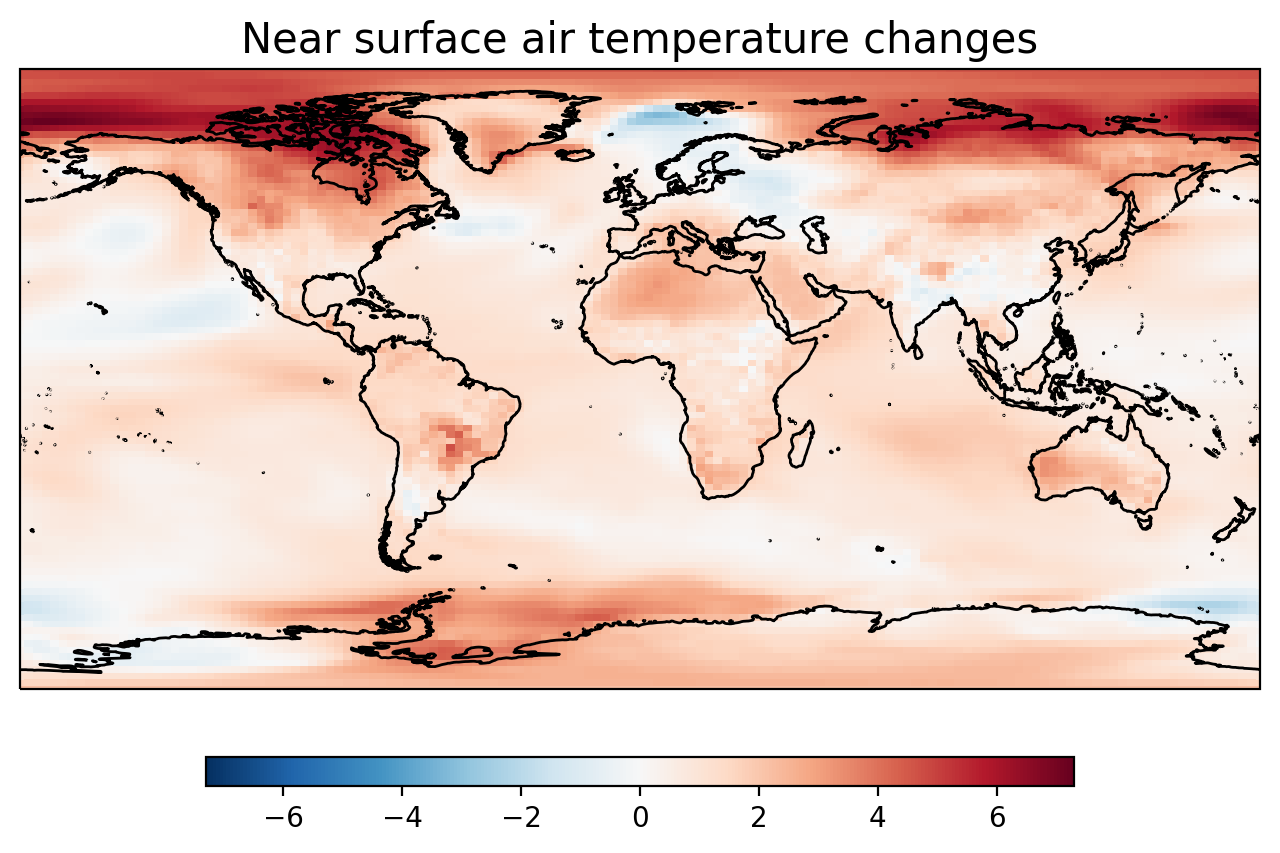

In [72]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree()) # Generate axes 
ax.coastlines('50m') # drawing coastlines
levels = np.arange(-10, 10.1, 2)
temp = mean_diff.squeeze().plot(ax=ax,
                      transform=ccrs.PlateCarree(), # What is the difference between 'transform' and 'projection'?
                     # cmap=cmaps.sunshine_diff_12lev, # choose colormap
                      #levels=levels, # discrete color bar
                      add_colorbar=False) # don't let xarray plot add colorbar automatically (which is the default)

# control color bar
cbar = plt.colorbar(temp,
                    orientation='horizontal', # control the orientation of color bar
                    shrink=0.7, # control the size of color bar relative to the axis
                    pad=0.073, # control the distance between color bar and the map
                    aspect=30, # control the width/height ratio of color bar
                    ticks=np.arange(-10, 10.1, 2)) # determine where to put the ticks
# control label size
cbar.ax.tick_params(labelsize=10)

# Add a title
plt.title('Near surface air temperature changes', fontsize=15)
plt.show()

In [73]:
df_world_map(forest_data, '1993',title='World Forest Area(% of land) at 1993')

In [74]:
df_world_map(forest_data, '2020',title='World Forest Area(% of land) at 2020')

In [75]:
df_world_map(birth_data, '1990',title='World Birth Rate,crude (per 1,000 people) at 1990')

In [76]:
df_world_map(birth_data, '2020',title='World Birth Rate,crude (per 1,000 people) at 2020')

**COMMENTS**
- we created 2 world maps for World Forest Area, one at 1993, another at 2020. Also, we created 2 world maps for World Birth Rate, one at 1990, another at 2020. 
- we need to recap the Section 1-Step 4: Calculate temperature changes for each country, in that step, we can know, the Top 3 in temperature rising countries are: Canada, Guatemala, Algeria. These 3 countries had most temperature changing in the world. But how about their Forest Area Changing situation?
- We can read from World Forest Area, one at 1993, another at 2020. Just from Color (deeper color means higher value), no obvious color change from 1993 to 2020 in these 3 countries.
- But when we read World Birth Rate, one at 1990, another at 2020. we can see the country: Guatemala, has clearly color change from the world map.
- Ranking No.2 in temperature rising country:Guatemala, has the significate change in birth rate from 1990 year 39.171 to 2020 year 21.816